In [1]:
import os, sys
from collections import Counter
import numpy as np
import numpy.random as rd
import pandas as pd
import scipy as sp
from scipy import stats as st
pd.options.display.max_rows = 999

import yellowbrick
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import font_manager
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline

##  
## Prepare iris data (DataFrame type)

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 標準化
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Model Learn

#### Logistic Regression
**Stacked Feature Importances**<br>
Some estimators return a multi-dimensonal array for either feature_importances_ or coef_ attributes. For example the LogisticRegression classifier returns a coef_ array in the shape of (n_classes, n_features) in the multiclass case. These coefficients map the importance of the feature to the prediction of the probability of a specific class. Although the interpretation of multi-dimensional feature importances depends on the specific estimator and model family, the data is treated the same in the FeatureImportances visualizer – namely the importances are averaged.

Taking the mean of the importances may be undesirable for several reasons. For example, a feature may be more informative for some classes than others. Multi-output estimators also do not benefit from having averages taken across what are essentially multiple internal models. In this case, use the stack=True parameter to draw a stacked bar chart of importances as follows:

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


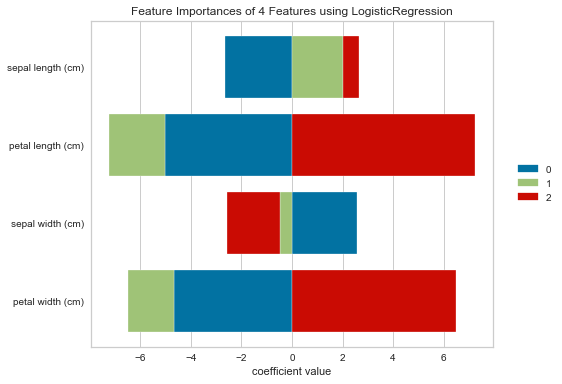

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


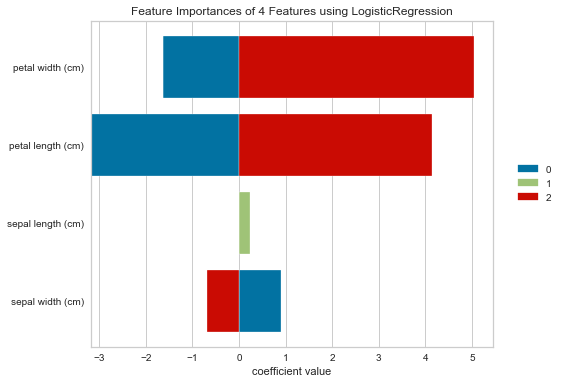

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


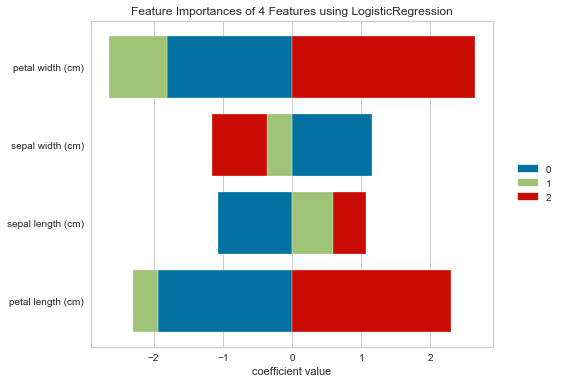

In [35]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import FeatureImportances

model1 = LogisticRegression(multi_class="auto", solver="saga", penalty="none")
model2 = LogisticRegression(multi_class="auto", solver="saga", penalty="l1")
model3 = LogisticRegression(multi_class="auto", solver="saga", penalty="l2")

for model in [model1,model2,model3]:
    viz = FeatureImportances(model, stack=True, relative=False)
    viz.fit(X, y)
    viz.show()

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


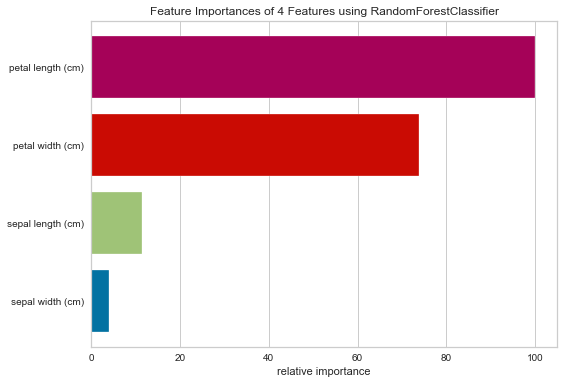

In [37]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=10)

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

## RFE(Recursive Feature Elimination)

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


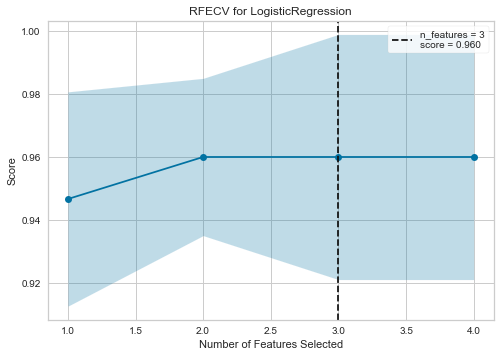

In [29]:
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV

from sklearn.linear_model import LogisticRegression

# visualizer = RFECV(SVC(kernel='linear', C=1))
visualizer = RFECV(LogisticRegression(multi_class="auto"))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## 以下 yellowbrick の試し書き

### Rank Features
標本が正規分布に従う母集団からサンプリングされたものであるという帰無仮説を検定する検定

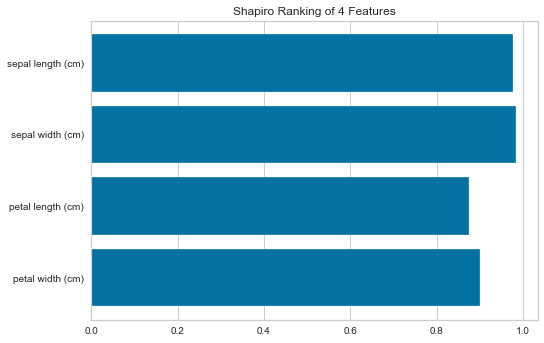

In [10]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # visualise

### 相関係数行列

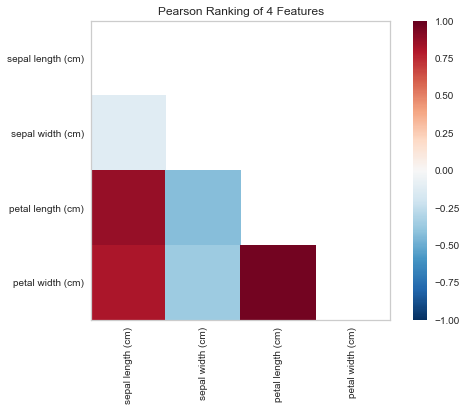

In [11]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X, y)
visualizer.show()

### 説明変数間の相関行列で、「petal width」と「petal length」の相関係数が高いので散布図を確認してみる

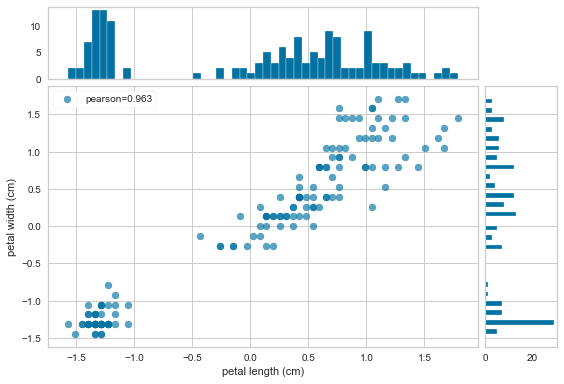

In [12]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['petal length (cm)', 'petal width (cm)'])
visualizer.fit_transform(X, y)
visualizer.show()

### 目的変数と説明変数の相関係数を表示

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


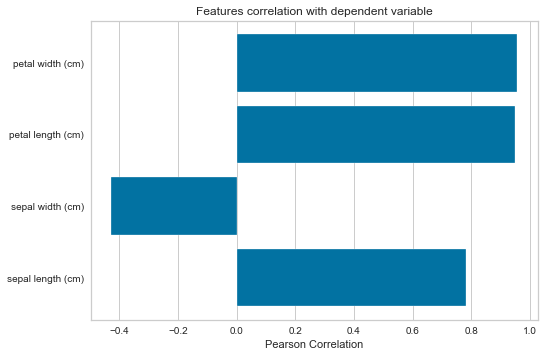

In [25]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=X.columns)
visualizer.fit(X, y) 
visualizer.show()  

### RadViz

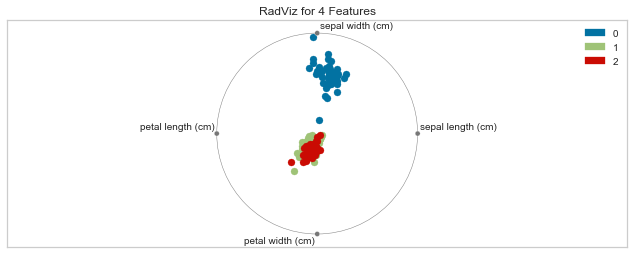

In [16]:
from yellowbrick.features import RadViz
# Specify the features of interest and the classes of the target 
# Instantiate the visualizer
visualizer = RadViz(features=X.columns, size = (800,300))
visualizer.fit(X, y)      
visualizer.transform(X)  
visualizer.poof()

### PCA

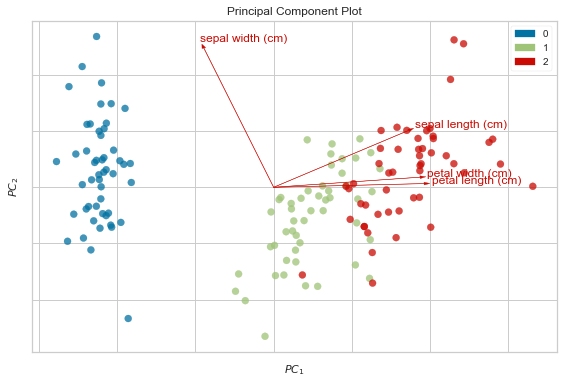

In [21]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()